<a href="https://www.kaggle.com/code/anderaraujo/pizza-price-prediction?scriptVersionId=105653556" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Pizza price project

**In this project I worked to make a prediction for pizza prices and understand which feature is more significant to increase or decrease prices**

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading data

In [2]:
df = pd.read_csv('../input/pizza-price-prediction/pizza_v2.csv')

## Preprocessing data

In [3]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [4]:
# understanding number of uniques
{col: df[col].nunique() for col in df.columns}

'''One-hot encoding generally does not perform well
if the categorical variable takes on a large number
of values (i.e., you generally won't use it for variables
taking more than 15 different values)'''

"One-hot encoding generally does not perform well\nif the categorical variable takes on a large number\nof values (i.e., you generally won't use it for variables\ntaking more than 15 different values)"

In [5]:
# extracting just numbers of price
df['price'] = df.price_rupiah.str.extract('(\d+\,\d+)')[0].str.replace(',','').astype('int64')

In [6]:
# extracting just numbers of diameter
df['diameter_inch'] = df.diameter.str.extract('(\d+)')[0].astype('int64')

## Exploratory data analysis

In [7]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price,diameter_inch
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no,235000,22
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no,198000,20
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes,120000,16
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes,155000,14
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes,248000,18


In [8]:
# Verifying number of null values
df.isna().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
price              0
diameter_inch      0
dtype: int64

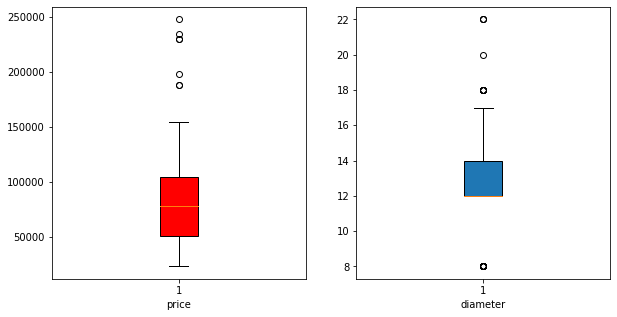

In [9]:
# understanding data, verifying outliers and distribution.

x1 = df.price.index
y1 = df.price.values

x2 = df.diameter_inch.index
y2 = df.diameter_inch.values

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.boxplot(y1, patch_artist= True, boxprops={"facecolor": "red"})
ax1.set_xlabel('price')
ax2.boxplot(y2, patch_artist=True)
ax2.set_xlabel('diameter')
fig.show()

## Which is the most expensive topping?

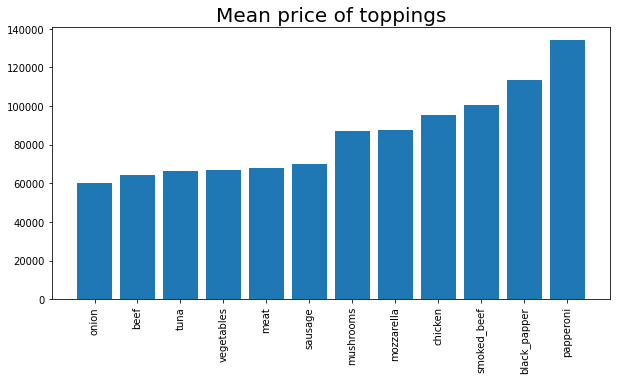

In [10]:
top_price = df.groupby('topping')['price'].mean().sort_values()

fig, ax = plt.subplots(figsize= (10,5))
ax.bar(x = top_price.index, height = top_price.values)
plt.xticks(rotation = 90)
ax.set_title('Mean price of toppings', fontdict = {'fontsize':20})
fig.show()

## Which company has the higher price

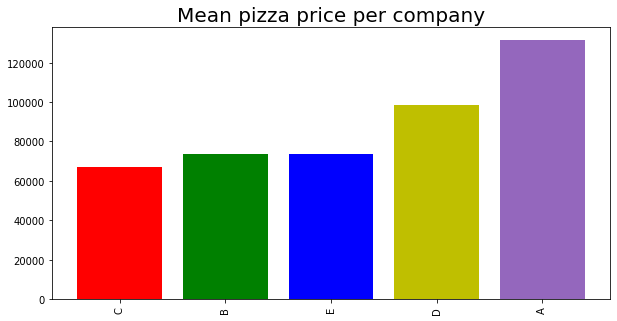

In [11]:
comp_price = df.groupby('company')['price'].mean().sort_values()

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x = comp_price.index, height = comp_price.values, color = ['r','g','b','y','C4'])
ax.set_title('Mean pizza price per company', fontdict={'fontsize':20})
plt.xticks(rotation = 90)
fig.show()

## Which extra is more required?

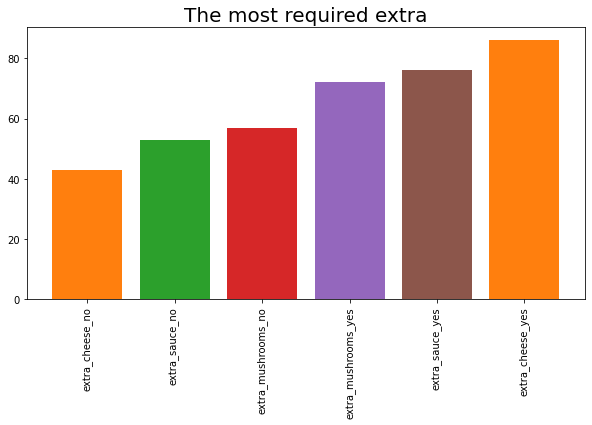

In [12]:
extras = pd.get_dummies(df[['extra_sauce','extra_cheese','extra_mushrooms']]).sum().sort_values()

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x = extras.index, height = extras.values, color = ['C' + str(c) for c in range(1,6)])
plt.xticks(rotation = 90)
ax.set_title('The most required extra', fontdict = {'fontsize':20})
fig.show()

## Which is the best seller size?

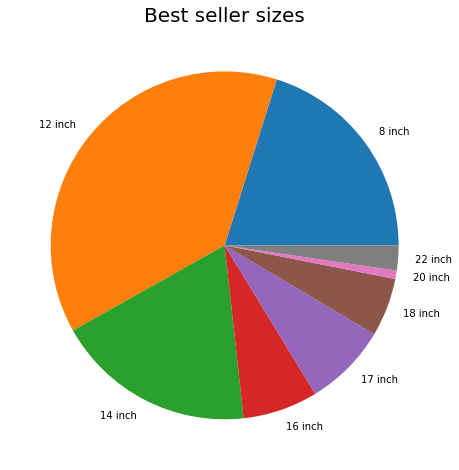

In [13]:
size_sales = df.groupby('diameter_inch').price.count()

fig, ax = plt.subplots(figsize=(10,8))
ax.pie(x = size_sales.values, labels= [str(s)+' inch'for s in size_sales.index])
ax.set_title('Best seller sizes', fontdict={'fontsize':20})
fig.show()

In [14]:
# Encoding some categorical features
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
oe.fit(df[['extra_sauce']])
df.extra_sauce = oe.transform(df[['extra_sauce']])

oe.fit(df[['extra_cheese']])
df.extra_cheese = oe.transform(df[['extra_cheese']])

oe.fit(df[['extra_mushrooms']])
df.extra_mushrooms = oe.transform(df[['extra_mushrooms']])

In [15]:
# Encoding company column
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder(sparse=False)

oh.fit(df[['company']])
cats_transformed = oh.transform(df[['company']])

cats = pd.DataFrame(cats_transformed, columns = ['company_A','company_B','campany_C','company_D','company_E'])

In [16]:
# This is the result of company column transformation
cats.head()

,company_A,company_B,campany_C,company_D,company_E
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [17]:
# One hot encoding topping column
oh.fit(df[['topping']])
topping_transformed = oh.transform(df[['topping']])

# Getting columns names
columns = oh.get_feature_names()

# Creating a data frame of toppings
tops = pd.DataFrame(topping_transformed, columns = columns)

tops.head()

,x0_beef,x0_black_papper,x0_chicken,x0_meat,x0_mozzarella,x0_mushrooms,x0_onion,x0_papperoni,x0_sausage,x0_smoked_beef,x0_tuna,x0_vegetables
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Joining company columns and toppings columns transformed to the first data frame.
df = df.join(cats,how = 'left')
df = df.join(tops,how = 'left')

df

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price,...,x0_chicken,x0_meat,x0_mozzarella,x0_mushrooms,x0_onion,x0_papperoni,x0_sausage,x0_smoked_beef,x0_tuna,x0_vegetables
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,1.0,1.0,0.0,235000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,1.0,1.0,0.0,198000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,1.0,1.0,1.0,120000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,1.0,0.0,1.0,155000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,1.0,0.0,1.0,248000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,1.0,1.0,1.0,39000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,1.0,1.0,1.0,72000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,1.0,1.0,1.0,99000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,1.0,0.0,1.0,44000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Excluding columns won't be used and categorical with more than 15 categories.
# Because we have 6 sizes and 8 diameter values, size column was excluded.

df.drop(['company','price_rupiah','diameter','variant','topping','size'], axis = 1, inplace = True)

df

,extra_sauce,extra_cheese,extra_mushrooms,price,diameter_inch,company_A,company_B,campany_C,company_D,company_E,...,x0_chicken,x0_meat,x0_mozzarella,x0_mushrooms,x0_onion,x0_papperoni,x0_sausage,x0_smoked_beef,x0_tuna,x0_vegetables
0,1.0,1.0,0.0,235000,22,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,198000,20,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,120000,16,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,155000,14,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,248000,18,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,1.0,1.0,1.0,39000,8,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125,1.0,1.0,1.0,72000,12,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
126,1.0,1.0,1.0,99000,14,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
127,1.0,0.0,1.0,44000,8,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Scaling price and diameter columns between 0 and 1 as the other columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range= (0,1))
scaler.fit(df[['price']])
price = scaler.transform(df[['price']])

scaler.fit(df[['diameter_inch']])
diameter = scaler.transform(df[['diameter_inch']])

df.price = price
df.diameter_inch = diameter

df

,extra_sauce,extra_cheese,extra_mushrooms,price,diameter_inch,company_A,company_B,campany_C,company_D,company_E,...,x0_chicken,x0_meat,x0_mozzarella,x0_mushrooms,x0_onion,x0_papperoni,x0_sausage,x0_smoked_beef,x0_tuna,x0_vegetables
0,1.0,1.0,0.0,0.942094,1.000000,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.777283,0.857143,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.429844,0.571429,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.585746,0.428571,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,1.000000,0.714286,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,1.0,1.0,1.0,0.069042,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125,1.0,1.0,1.0,0.216036,0.285714,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
126,1.0,1.0,1.0,0.336303,0.428571,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
127,1.0,0.0,1.0,0.091314,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Making predictions

In [21]:
# Separating features and target

y = df.price
x = df.drop('price', axis = 1)

In [22]:
#Spliting train dataset and test dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [23]:
# Defining model

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 0)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [24]:
# Making predictions

preds = rf.predict(x_test)

In [25]:
# Evaluating model with metrics

from sklearn.metrics import mean_absolute_error, r2_score
print(f'model MAE: {mean_absolute_error(y_test, preds):.2f}\nmodel R2: {r2_score(y_test, preds):.2f}')

model MAE: 0.05
model R2: 0.77


## Model MAE: 0.05
## Model R2: 0.77

## Understanding feature importance

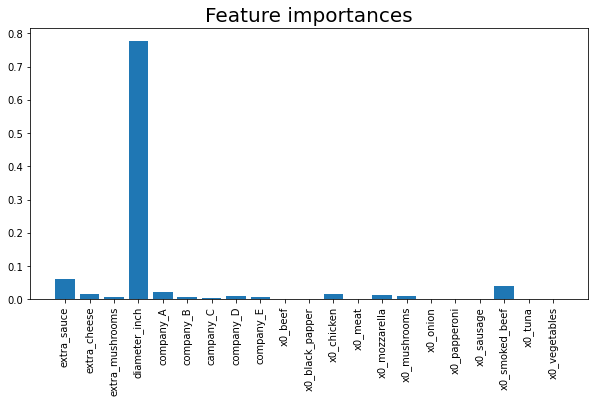

In [26]:
#Creating a dict with feature importances. the higher, the more important the feature.

imp_dict = {feature:round(score,3) for feature, score in zip(x.columns, rf.feature_importances_)}
df_imp = pd.DataFrame(imp_dict.values(), index = imp_dict.keys())

# Plotting feature importances

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x = df_imp.index, height = df_imp[0])
ax.set_title('Feature importances', fontdict = {'fontsize':20})
plt.xticks(rotation = 90)
fig.show()